<a href="https://colab.research.google.com/github/mariyagolchin/Building-a-Convolutional-Neural-Network-CNN-in-Keras/blob/main/Building_a_Convolutional_Neural_Network_(CNN)_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Building a Convolutional Neural Network (CNN) in Keras

https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5


https://github.com/eijaz1/Building-a-CNN-in-Keras-Tutorial/blob/master/cnn_tutorial.ipynb


# **Loading the dataset**
The **mnist dataset **is conveniently provided to us as part of the **Keras library**.
 
so we can **easily load the dataset**. 

Out of the **70,000 images** provided in the dataset:

   ** 60,000 **are given for** training** 
   
   and
   
   ** 10,000** are given for **testing**.

When we load the dataset below, **X_train and X_test** will contain the images, and **y_train and y_test** will contain the digits that those images represent.

In [21]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Exploratory data analysis
Now let’s take a look at one of the images in our dataset to see what we are working with. We will plot the first image in our dataset and check its size using the ‘shape’ function.

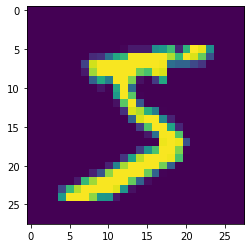

In [22]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [23]:
#check image shape
X_train[0].shape

(28, 28)

## Data pre-processing
Next, we need to reshape our dataset inputs** (X_train and X_test) **to the shape that our model expects when we train the model. The first number is the number of images **(60,000 for X_train and 10,000 for X_test)**. Then comes the shape of each image **(28x28)**. The last number is 1, which signifies that the images are greyscale.

In [24]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

We need to ‘**one-hot-encode**’ our target variable. This means that** a column will be created for each output category** and a binary variable is inputted for each category. For example, we saw that the first image in the dataset is a 5. This means that the sixth number in our array will have a 1 and the rest of the array will be filled with 0.

In [25]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Building the model
Now we are ready to build our model. Here is the code:

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

The **model type** that we will be using is **Sequential**.

**Sequential** is the **easiest way to build a model in Keras**. It allows you to **build a model layer by layer.**
We use the **‘add()’ function** to **add layers to our model**.

Our **first 2 layers** are **Conv2D layers**. These are **convolution layers** that will **deal with our input images**, which are seen as **2-dimensional matrices**.

**64** in the first layer and **32** in the second layer are the** number of nodes in each layer**. This number **can be adjusted to be higher or lower**, depending on the size of the dataset. **In our case, 64 and 32 work well**, so we will stick with this for now.

**Kernel size** is the **size of the filter matrix** for our convolution. So a **kernel size of 3 **means we will have a **3x3 filter matrix**. Refer back to the introduction and the first image for a refresher on this.

**Activation** is the** activation function** for the layer. The activation function we will be using for our first 2 layers is the **ReLU**, or **Rectified Linear Activation**. This activation function has been proven to **work well in neural networks**.

Our **first layer** also takes in an** input shape**. This is the shape of each input image, 28,28,1 as seen earlier on, with the 1 signifying that the images are greyscale.

In between the **Conv2D layers and the dense layer**, there is a **‘Flatten’ layer**. Flatten serves as a **connection between the convolution and dense layers**.


**‘Dense’** is the **layer type** we will use in for our output layer. Dense is a standard layer type that is used in many cases for neural networks.
We will have **10 nodes in our output layer**, one for each possible outcome (0–9).

The **activation is ‘softmax’**. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

## **Compiling the model**
Next, we need to compile our model. Compiling the model takes three parameters: optimizer, loss and metrics.

In [30]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


The **optimizer** **controls the learning rate**. We will be using **‘adam’** as our optmizer. Adam is generally a **good optimizer to use for many cases**. The adam optimizer adjusts the learning rate throughout training.

The **learning rate** determines how fast the optimal weights for the model are calculated. A **smaller learning rate may** lead to **more accurate weights** (up to a certain point), but the **time it takes to compute the weights will be longer.**

We will use ‘**categorical_crossentropy’** for our **loss function**. This is the **most common choice for classification**. A **lower score indicates that the model is performing better**.

To make things even easier to interpret, we will use the **‘accuracy’** metric to **see the accuracy score on the validation set when we train the model**.

## Training the model

In [31]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 354s 188ms/step - loss: 0.5187 - accuracy: 0.9260 - val_loss: 0.0589 - val_accuracy: 0.9801
Epoch 2/3
1875/1875 [==============================] - 353s 188ms/step - loss: 0.0565 - accuracy: 0.9820 - val_loss: 0.0543 - val_accuracy: 0.9822
Epoch 3/3
1875/1875 [==============================] - 350s 187ms/step - loss: 0.0385 - accuracy: 0.9875 - val_loss: 0.0592 - val_accuracy: 0.9830


Now we will train our model.To train, we will use the **‘fit()’ function** **on our model** with the **following parameters:** **training data (train_X), target data (train_y), validation data, and the number of epochs**.
For our **validation data**, we will use the** test set** provided to us in our dataset, which we have **split into X_test and y_test**.

**The number of epochs is the number of times the model will cycle through the data**. The more epochs we run, the more the model will improve, up to a certain point. After that point, the model will stop improving during each epoch. For our model, we will **set the number of epochs to 3**.

In [32]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[4.5621191e-09, 2.2740132e-12, 1.4486498e-08, 1.5363687e-09,
        1.3807479e-13, 2.5407156e-11, 2.3049254e-16, 1.0000000e+00,
        1.9903233e-08, 1.4292896e-08],
       [3.5237638e-06, 4.3844243e-06, 9.9993491e-01, 2.4215550e-09,
        7.2854861e-10, 2.8229089e-10, 3.3519245e-05, 1.1493596e-13,
        2.3609322e-05, 1.0350132e-11],
       [7.2509676e-10, 9.9999988e-01, 1.9183135e-09, 1.5036394e-11,
        4.1457216e-08, 9.9059849e-10, 1.6125068e-09, 4.5794937e-09,
        9.0832316e-08, 5.7770708e-11],
       [9.9975353e-01, 1.5211349e-10, 1.1443099e-07, 4.5119517e-09,
        1.3434362e-07, 2.6669485e-07, 2.3912154e-04, 2.8662213e-09,
        2.3319212e-06, 4.6146288e-06]], dtype=float32)

In [33]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)